# Usage: datasets
Here, we will review the raw/cleaned datasets. `Scenario` class performs data cleaning internally using `JHUData` class and so on, but it is important to review the features and data types before analysing them.

### Preparation
Prepare the packages.

In [1]:
from pprint import pprint

In [2]:
import covsirphy as cs
cs.__version__

'2.17.0'

### Dataset preparation
Download the datasets to "input" directory and load them.

If "input" directory has the datasets, `DataLoader` instance will load the local files. If the datasets were updated in remote servers, `DataLoader` will update the local files automatically and download the datasets to "../input" directory and load them. We can change the directory when creating the instance.

In [3]:
# Create DataLoader instance
data_loader = cs.DataLoader("../input")

In [4]:
# The number of cases (JHU style)
jhu_data = data_loader.jhu(verbose=True)
# Population in each country
population_data = data_loader.population()
# Government Response Tracker (OxCGRT)
oxcgrt_data = data_loader.oxcgrt()

In [5]:
# Linelist of case reports
linelist = data_loader.linelist()
# The number of tests
pcr_data = data_loader.pcr()
# The number of vaccinations
vaccine_data = data_loader.vaccine()
# Population pyramid
pyramid_data = data_loader.pyramid()
# Japan-specific dataset
japan_data = data_loader.japan()

### The number of cases (JHU style)
The main dataset is that of the number of cases and was saved as `jhu_data`, an instance of `JHUData` class. This includes "Confirmed", "Infected", "Recovered" and "Fatal". "Infected" was calculated as "Confirmed - Recovered - Fatal".

In [6]:
type(jhu_data)

covsirphy.cleaning.jhu_data.JHUData

The dataset will be retrieved from [COVID-19 Data Hub](https://covid19datahub.io/) and [Data folder of CovsirPhy project](https://github.com/lisphilar/covid19-sir/tree/master/data). Description of these projects will be shown as follows.

In [7]:
# Description/citation
print(jhu_data.citation)

(Secondary source) Guidotti, E., Ardia, D., (2020), "COVID-19 Data Hub", Journal of Open Source Software 5(51):2376, doi: 10.21105/joss.02376.
Lisphilar (2020), COVID-19 dataset in Japan, GitHub repository, https://github.com/lisphilar/covid19-sir/data/japan


In [8]:
# Detailed citation list of COVID-19 Data Hub
# print(data_loader.covid19dh_citation)

In [9]:
# Raw data
jhu_data.raw.tail()

,ObservationDate,Tests,Confirmed,Recovered,Deaths,Population,ISO3,Province/State,Country/Region,school_closing,...,cancel_events,gatherings_restrictions,transport_closing,stay_home_restrictions,internal_movement_restrictions,international_movement_restrictions,information_campaigns,testing_policy,contact_tracing,stringency_index
423571,2021-02-23,5756,1359.0,1331,21,107808.0,COL,Vichada,Colombia,3,...,1,3,1,1,1,4,2,2,2,81.02
423572,2021-02-24,5760,1362.0,1331,22,107808.0,COL,Vichada,Colombia,3,...,1,3,1,1,1,4,2,2,2,81.02
423573,2021-02-25,5761,1362.0,1331,22,107808.0,COL,Vichada,Colombia,3,...,1,3,1,1,1,4,2,2,2,81.02
423574,2021-02-26,5761,1362.0,1331,22,107808.0,COL,Vichada,Colombia,3,...,1,3,1,1,1,4,2,2,2,81.02
423575,2021-02-27,5761,1362.0,1331,22,107808.0,COL,Vichada,Colombia,3,...,1,3,1,1,1,4,2,2,2,81.02


In [10]:
# Cleaned data
jhu_data.cleaned().tail()

,Date,Country,Province,Confirmed,Infected,Fatal,Recovered
17082,2021-02-24,Japan,-,427467,16502,7584,403381
17083,2021-02-25,Japan,-,428553,15649,7647,405257
17084,2021-02-26,Japan,-,429472,15166,7722,406584
17085,2021-02-27,Japan,-,430539,14712,7807,408020
17086,2021-02-28,Japan,-,431740,14561,7860,409319


In [11]:
jhu_data.cleaned().info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 420311 entries, 0 to 17086
Data columns (total 7 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   Date       420311 non-null  datetime64[ns]
 1   Country    420311 non-null  category      
 2   Province   420311 non-null  category      
 3   Confirmed  420311 non-null  int64         
 4   Infected   420311 non-null  int64         
 5   Fatal      420311 non-null  int64         
 6   Recovered  420311 non-null  int64         
dtypes: category(2), datetime64[ns](1), int64(4)
memory usage: 20.9 MB


Total number of cases in all countries with `JHUData.total()` method.

In [12]:
# Calculate total values
total_df = jhu_data.total()
total_df.tail()

,Confirmed,Infected,Fatal,Recovered,Fatal per Confirmed,Recovered per Confirmed,Fatal per (Fatal or Recovered)
Date,,,,,,,
2021-02-23,112125814,40022903,2486465,69616446,0.022176,0.620878,0.034485
2021-02-24,112537246,40230142,2497693,69809411,0.022194,0.620323,0.034543
2021-02-25,112956577,40399918,2507372,70049287,0.022198,0.620143,0.034557
2021-02-26,113343966,40555662,2515988,70272316,0.022198,0.619992,0.034566
2021-02-27,113350934,40560981,2516127,70273826,0.022198,0.619967,0.034567


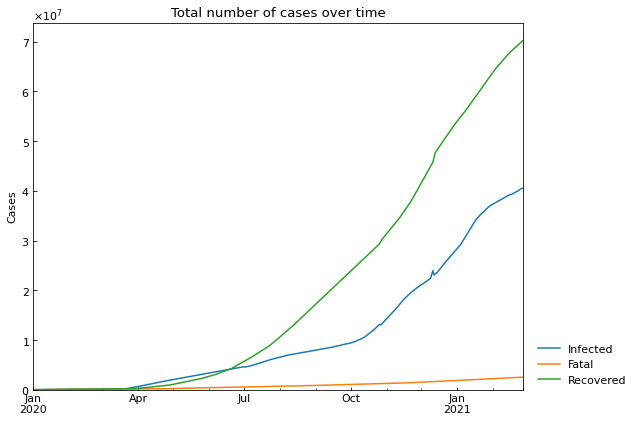

In [13]:
# Plot the total values
cs.line_plot(total_df[["Infected", "Fatal", "Recovered"]], "Total number of cases over time")

In [14]:
# Statistics of rate values in all countries
total_df.loc[:, total_df.columns.str.contains("per")].describe().T

,count,mean,std,min,25%,50%,75%,max
Fatal per Confirmed,418.0,0.035969,0.017510,0.000000,0.022604,0.031297,0.045227,0.074262
Recovered per Confirmed,418.0,0.525992,0.187840,0.018591,0.412817,0.617142,0.650245,1.000000
Fatal per (Fatal or Recovered),418.0,0.088994,0.088374,0.000000,0.035036,0.052741,0.115451,0.539474


We can create a subset for a country using `JHUData.subset()` method.

In [15]:
# Subset for a country
df, _ = jhu_data.records("Japan")
df.tail()
# We can use ISO3 code etc.
# df, _ = jhu_data.records("JPN")
# df.tail()

,Date,Confirmed,Infected,Fatal,Recovered
384,2021-02-24,427467,16502,7584,403381
385,2021-02-25,428553,15649,7647,405257
386,2021-02-26,429472,15166,7722,406584
387,2021-02-27,430539,14712,7807,408020
388,2021-02-28,431740,14561,7860,409319


Province ("prefecture" for Japan) name can be specified.

In [16]:
df, _ = jhu_data.records("Japan", province="Tokyo")
df.tail()

,Date,Confirmed,Infected,Fatal,Recovered
342,2021-02-23,110187,3775,1285,105127
343,2021-02-24,110400,3503,1302,105595
344,2021-02-25,110740,3460,1325,105955
345,2021-02-26,111010,3344,1355,106311
346,2021-02-27,111347,3342,1370,106635


In [17]:
# Countries we can select
pprint(jhu_data.countries(), compact=True)

['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia', 'Austria',
 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados', 'Belarus',
 'Belgium', 'Belize', 'Benin', 'Bermuda', 'Bhutan', 'Bolivia',
 'Bosnia and Herzegovina', 'Botswana', 'Brazil', 'Brunei', 'Bulgaria',
 'Burkina Faso', 'Burundi', 'Cambodia', 'Cameroon', 'Canada', 'Cape Verde',
 'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia', 'Comoros',
 'Costa Rica', "Cote d'Ivoire", 'Croatia', 'Cuba', 'Cyprus', 'Czech Republic',
 'Democratic Republic of the Congo', 'Denmark', 'Djibouti', 'Dominica',
 'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador', 'Equatorial Guinea',
 'Eritrea', 'Estonia', 'Ethiopia', 'Fiji', 'Finland', 'France', 'Gabon',
 'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece', 'Grenada', 'Guam',
 'Guatemala', 'Guinea', 'Guinea-Bissau', 'Guyana', 'Haiti', 'Holy See',
 'Honduras', 'Hungary', 'Iceland', 'India', 'Indonesia', 'Ira

`JHUData.records()` automatically complement the records, if necesssary and `auto_complement=True` (default). Each country can have either none or one or multiple complements, depending on the records and their preprocessing analysis.

We can show the specific kind of complements that were applied to the records of each country with `JHUData.show_complement()` method. The possible kinds of complement for each country are the following:  

1. "Monotonic_confirmed/fatal/recovered" (monotonic increasing complement)  
Force the variable show monotonic increasing.

2. "Full_recovered" (full complement of recovered data)  
Estimate the number of recovered cases using the value of estimated average recovery period.

3. "Partial_recovered" (partial complement of recovered data)  
When recovered values are not updated for some days, extrapolate the values.

In [18]:
# For selected country
jhu_data.show_complement(country="Japan")

,Country,Province,Monotonic_confirmed,Monotonic_fatal,Monotonic_recovered,Full_recovered,Partial_recovered
0,Japan,-,False,False,True,False,True


In [19]:
# Show the details of complement for all countries
# jhu_data.show_complement().tail()
# For selected province
# jhu_data.show_complement(country="Japan", province="Tokyo")
# For selected countries
# jhu_data.show_complement(country=["Greece", "Japan"])

Note for recovery period:  
With the global cases records, we estimate the average recovery period using `JHUData.calculate_recovery_period()`.  

What we currently do is to calculate the difference between confirmed cases and fatal cases and try to match it to some recovered cases value in the future. We apply this method for every country that has valid recovery data and average the partial recovery periods in order to obtain a single (average) recovery period. During the calculations, we ignore time intervals that lead to very short (<7 days) or very long (>90 days) partial recovery periods, if these exist with high frequency (>50%) in the records. We have to assume temporarily invariable compartments for this analysis to extract an approximation of the average recovery period.

Alternatively, we had tried to use linelist data to get precise value of recovery period (average of recovery date minus confirmation date for cases), but the number of records was too small.

In [20]:
recovery_period = jhu_data.calculate_recovery_period()
print(f"Average recovery period: {recovery_period} [days]")

Average recovery period: 16 [days]


We can visualize the number of cases with `.map()` method. When `country` is `None`, global map will be shown.

Global map with country level data:

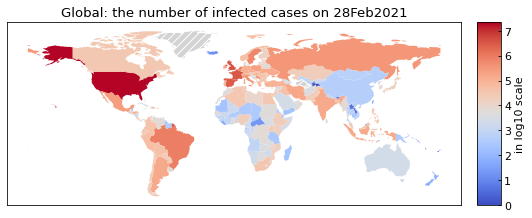

In [21]:
# Global map with country level data
jhu_data.map(country=None, variable="Infected")
# To set included/exclude some countries
# jhu_data.map(country=None, variable="Infected", included=["Japan"])
# jhu_data.map(country=None, variable="Infected", excluded=["Japan"])
# To change the date
# jhu_data.map(country=None, variable="Infected", date="01Oct2021")

In [22]:
# Country level data
jhu_data.layer(country=None).tail()

,ISO3,Date,Country,Confirmed,Infected,Fatal,Recovered
82640,JPN,2021-02-24,Japan,427467,16502,7584,403381
82641,JPN,2021-02-25,Japan,428553,15649,7647,405257
82642,JPN,2021-02-26,Japan,429472,15166,7722,406584
82643,JPN,2021-02-27,Japan,430539,14712,7807,408020
82644,JPN,2021-02-28,Japan,431740,14561,7860,409319


Country map with province level data:

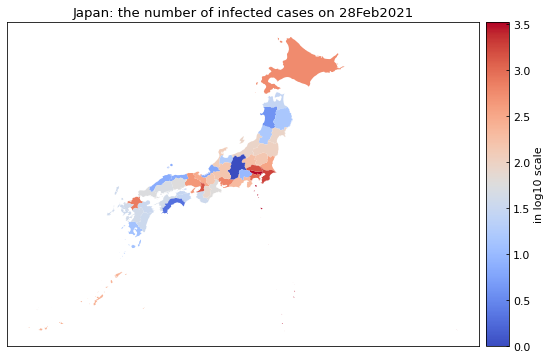

In [23]:
# Country map with province level data
jhu_data.map(country="Japan", variable="Infected")
# To set included/exclude some countries
# jhu_data.map(country="Japan", variable="Infected", included=["Tokyo"])
# jhu_data.map(country="Japan", variable="Infected", excluded=["Tokyo"])
# To change the date
# jhu_data.map(country="Japan", variable="Infected", date="01Oct2021")

In [24]:
# Province level data
jhu_data.layer(country="Japan").tail()

,ISO3,Date,Country,Province,Confirmed,Infected,Fatal,Recovered
16693,JPN,2021-02-24,Japan,Entering,2219,31,2,2186
16694,JPN,2021-02-25,Japan,Entering,2220,28,2,2190
16695,JPN,2021-02-26,Japan,Entering,2221,27,2,2192
16696,JPN,2021-02-27,Japan,Entering,2229,34,2,2193
16697,JPN,2021-02-28,Japan,Entering,2235,38,2,2195


### Linelist of case reports
The number of cases is important, but linelist of case reports will helpful to understand the situation deeply. Linelist data was saved as `linelist`, an instance of `LinelistData` class. This dataset is from [Open COVID-19 Data Working Group](https://github.com/beoutbreakprepared/nCoV2019).

In [25]:
type(linelist)

covsirphy.cleaning.linelist.LinelistData

In [26]:
# Citation
print(linelist.citation)

Xu, B., Gutierrez, B., Mekaru, S. et al. Epidemiological data from the COVID-19 outbreak, real-time case information. Sci Data 7, 106 (2020). https://doi.org/10.1038/s41597-020-0448-0


In [27]:
# Raw dataset
linelist.raw.tail()

,age,sex,province,country,date_admission_hospital,date_confirmation,symptoms,chronic_disease,outcome,date_death_or_discharge
2676307,52,female,Lima,Peru,NaN,17.05.2020,NaN,NaN,NaN,NaN
2676308,52,female,Lima,Peru,NaN,17.05.2020,NaN,NaN,NaN,NaN
2676309,52,male,Callao,Peru,NaN,17.05.2020,NaN,NaN,NaN,NaN
2676310,52,male,Lima,Peru,NaN,17.05.2020,NaN,NaN,NaN,NaN
2676311,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [28]:
# Cleaned dataset
linelist.cleaned().tail()

,Country,Province,Hospitalized_date,Confirmation_date,Outcome_date,Confirmed,Infected,Recovered,Fatal,Symptoms,Chronic_disease,Age,Sex
2676306,Peru,Coronel Portillo,NaT,2020-05-17,NaT,True,False,False,False,NaN,NaN,52.0,female
2676307,Peru,Lima,NaT,2020-05-17,NaT,True,False,False,False,NaN,NaN,52.0,female
2676308,Peru,Lima,NaT,2020-05-17,NaT,True,False,False,False,NaN,NaN,52.0,female
2676309,Peru,Callao,NaT,2020-05-17,NaT,True,False,False,False,NaN,NaN,52.0,male
2676310,Peru,Lima,NaT,2020-05-17,NaT,True,False,False,False,NaN,NaN,52.0,male


In [29]:
# Subset for specified area
linelist.subset("Japan", province="Tokyo").tail()

,Hospitalized_date,Confirmation_date,Outcome_date,Confirmed,Infected,Recovered,Fatal,Symptoms,Chronic_disease,Age,Sex
107,NaT,2020-01-30,NaT,True,False,False,False,NaN,NaN,NaN,female
108,NaT,2020-01-24,NaT,True,False,True,False,fever:pneumonia:sore throat,NaN,40.0,male
109,2020-10-01,2020-01-15,2020-01-15,True,False,True,False,cough:fever:sore throat,NaN,30.0,male
110,NaT,2020-01-25,NaT,True,False,False,False,cough:fever,NaN,NaN,female
111,NaT,2020-01-26,NaT,True,False,False,False,fever:joint pain:pneumonia,NaN,40.0,male


In [30]:
# Subset for outcome ("Recovered" or "Fatal")
linelist.closed(outcome="Recovered").tail()

,Country,Province,Hospitalized_date,Confirmation_date,Recovered_date,Symptoms,Chronic_disease,Age,Sex
272,Singapore,-,2020-02-02,2020-02-06,2020-02-17,NaN,NaN,39.0,female
273,Malaysia,Johor,NaT,2020-01-25,2020-02-08,cough:fever,NaN,40.0,male
274,China,Gansu,2020-07-02,2020-02-08,2020-02-17,diarrhea,NaN,1.0,female
275,Canada,Ontario,NaT,2020-01-25,2020-01-31,NaN,hypertension,NaN,male
276,Canada,Ontario,NaT,2020-01-31,2020-02-19,NaN,NaN,NaN,female


As the median value of the period from confirmation to recovery, we can calculate recovery period.

In [31]:
# Recovery period (integer) [days]
linelist.recovery_period()

12

### Population in each country
Population values are necessary to calculate the number of susceptible people. Susceptible is a variable of SIR-derived models. This dataset was saved as `population_data`, an instance of `PopulationData` class.

In [32]:
type(population_data)

covsirphy.cleaning.population.PopulationData

In [33]:
# Description/citation
print(population_data.citation)

(Secondary source) Guidotti, E., Ardia, D., (2020), "COVID-19 Data Hub", Journal of Open Source Software 5(51):2376, doi: 10.21105/joss.02376.


In [34]:
# Raw data (the same as jhu_data)
# population_data.raw.tail()

In [35]:
# Cleaned data
population_data.cleaned().tail()

,ISO3,Country,Province,Date,Population
364635,COL,Colombia,Vichada,2021-02-23,107808
364636,COL,Colombia,Vichada,2021-02-24,107808
364637,COL,Colombia,Vichada,2021-02-25,107808
364638,COL,Colombia,Vichada,2021-02-26,107808
364639,COL,Colombia,Vichada,2021-02-27,107808


We will get the population values with `PopulationData.value()`.

In [36]:
# In a country
population_data.value("Japan", province=None)
# In a country with ISO3 code
# population_data.value("JPN", province=None)
# In a province (prefecture)
# population_data.value("Japan", province="Tokyo")

126529100

We can update the population values.

In [37]:
# Before
population_before = population_data.value("Japan", province="Tokyo")
print(f"Before: {population_before}")
# Register population value of Tokyo in Japan
# https://www.metro.tokyo.lg.jp/tosei/hodohappyo/press/2020/06/11/07.html
population_data.update(14_002_973, "Japan", province="Tokyo")
population_after = population_data.value("Japan", province="Tokyo")
print(f" After: {population_after}")

Before: 13942856


 After: 14002973


We can visualize the number of cases with `.map()` method. When `country` is `None`, global map will be shown. Arguments are the same as `JHUData`, but variable name cannot be specified.

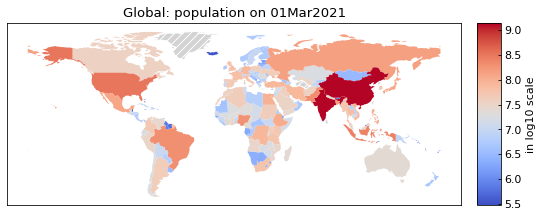

In [38]:
# Global map with country level data
population_data.map(country=None)

In [39]:
# Country level data
population_data.layer(country=None).tail()

,ISO3,Country,Date,Population
82675,ZWE,Zimbabwe,2021-02-23,14439018
82676,ZWE,Zimbabwe,2021-02-24,14439018
82677,ZWE,Zimbabwe,2021-02-25,14439018
82678,ZWE,Zimbabwe,2021-02-26,14439018
82679,ZWE,Zimbabwe,2021-02-27,14439018


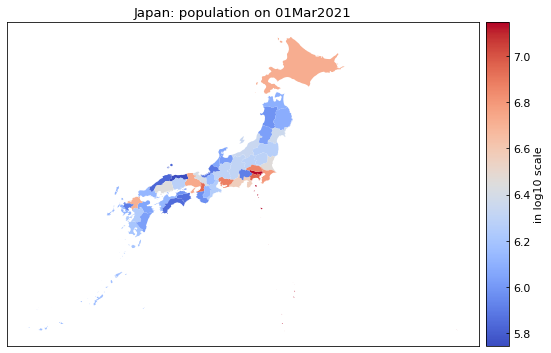

In [40]:
# Country map with province level data
population_data.map(country="Japan")

In [41]:
# Province level data
population_data.layer(country="Japan").tail()

,ISO3,Country,Province,Date,Population
19924,JPN,Japan,Kagawa,2021-02-24,956069
19925,JPN,Japan,Kagawa,2021-02-25,956069
19926,JPN,Japan,Kagawa,2021-02-26,956069
19927,JPN,Japan,Kagawa,2021-02-27,956069
19928,-,Japan,Tokyo,2021-03-01,14002973


### Government Response Tracker (OxCGRT)
Government responses are tracked with [Oxford Covid-19 Government Response Tracker (OxCGRT)](https://github.com/OxCGRT/covid-policy-tracker). Because government responses and activities of persons change the parameter values of SIR-derived models, this dataset is significant when we try to forcast the number of cases.  
With `DataLoader` class, the dataset was retrieved via [COVID-19 Data Hub](https://covid19datahub.io/) and saved as `oxcgrt_data`, an instance of `OxCGRTData` class.

In [42]:
type(oxcgrt_data)

covsirphy.cleaning.oxcgrt.OxCGRTData

In [43]:
# Description/citation
print(oxcgrt_data.citation)

(Secondary source) Guidotti, E., Ardia, D., (2020), "COVID-19 Data Hub", Journal of Open Source Software 5(51):2376, doi: 10.21105/joss.02376.


In [44]:
# Raw data (the same as jhu_data)
# oxcgrt_data.raw.tail()

In [45]:
# Cleaned data
oxcgrt_data.cleaned().tail()

,Date,Country,ISO3,School_closing,Workplace_closing,Cancel_events,Gatherings_restrictions,Transport_closing,Stay_home_restrictions,Internal_movement_restrictions,International_movement_restrictions,Information_campaigns,Testing_policy,Contact_tracing,Stringency_index
423571,2021-02-23,Colombia,COL,3,1,1,3,1,1,1,4,2,2,2,81.02
423572,2021-02-24,Colombia,COL,3,1,1,3,1,1,1,4,2,2,2,81.02
423573,2021-02-25,Colombia,COL,3,1,1,3,1,1,1,4,2,2,2,81.02
423574,2021-02-26,Colombia,COL,3,1,1,3,1,1,1,4,2,2,2,81.02
423575,2021-02-27,Colombia,COL,3,1,1,3,1,1,1,4,2,2,2,81.02


In [46]:
# Subset for a country
oxcgrt_data.subset("Japan").tail()
# We can use ISO3 codes
# oxcgrt_data.subset("JPN").tail()

,Date,School_closing,Workplace_closing,Cancel_events,Gatherings_restrictions,Transport_closing,Stay_home_restrictions,Internal_movement_restrictions,International_movement_restrictions,Information_campaigns,Testing_policy,Contact_tracing,Stringency_index
419,2021-02-23,1,1,1,0,1,1,1,4,2,2,1,53.24
420,2021-02-24,1,1,1,0,1,1,1,4,2,2,1,53.24
421,2021-02-25,1,1,1,0,1,1,1,4,2,2,1,53.24
422,2021-02-26,1,1,1,0,1,1,1,4,2,2,1,53.24
423,2021-02-27,1,1,1,0,1,1,1,4,2,2,1,53.24


We can visualize the number of cases with `.map()` method. Arguments are the same as `JHUData`, but country name cannot be specified.

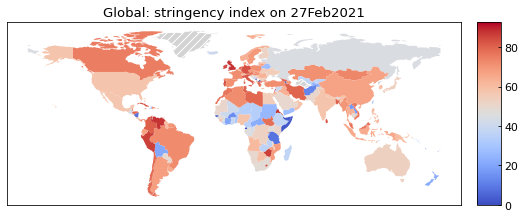

In [47]:
# Global map with country level data
oxcgrt_data.map(variable="Stringency_index")

In [48]:
# Country level data
oxcgrt_data.layer().tail()

,Date,Country,ISO3,School_closing,Workplace_closing,Cancel_events,Gatherings_restrictions,Transport_closing,Stay_home_restrictions,Internal_movement_restrictions,International_movement_restrictions,Information_campaigns,Testing_policy,Contact_tracing,Stringency_index
423571,2021-02-23,Colombia,COL,3,1,1,3,1,1,1,4,2,2,2,81.02
423572,2021-02-24,Colombia,COL,3,1,1,3,1,1,1,4,2,2,2,81.02
423573,2021-02-25,Colombia,COL,3,1,1,3,1,1,1,4,2,2,2,81.02
423574,2021-02-26,Colombia,COL,3,1,1,3,1,1,1,4,2,2,2,81.02
423575,2021-02-27,Colombia,COL,3,1,1,3,1,1,1,4,2,2,2,81.02


### The number of tests
The number of tests is also key information to understand the situation.
This dataset was saved as `pcr_data`, an instance of `PCRData` class.

In [49]:
type(pcr_data)

covsirphy.cleaning.pcr_data.PCRData

In [50]:
# Description/citation
print(pcr_data.citation)

(Secondary source) Guidotti, E., Ardia, D., (2020), "COVID-19 Data Hub", Journal of Open Source Software 5(51):2376, doi: 10.21105/joss.02376.
Hasell, J., Mathieu, E., Beltekian, D. et al. A cross-country database of COVID-19 testing. Sci Data 7, 345 (2020). https://doi.org/10.1038/s41597-020-00688-8
Lisphilar (2020), COVID-19 dataset in Japan, GitHub repository, https://github.com/lisphilar/covid19-sir/data/japan


In [51]:
# Raw data (the same as jhu_data)
# pcr_data.raw.tail()

In [52]:
# Cleaned data
pcr_data.cleaned().tail()

,Date,Country,Province,Tests,Confirmed
17082,2021-02-24,Japan,-,8026999,427467
17083,2021-02-25,Japan,-,8083230,428553
17084,2021-02-26,Japan,-,8143924,429472
17085,2021-02-27,Japan,-,8203285,430539
17086,2021-02-28,Japan,-,8234982,431740


In [53]:
# Subset for a country
pcr_data.subset("Japan").tail()
# We can use ISO3 codes
# pcr_data.subset("JPN").tail()

,Date,Tests,Confirmed
384,2021-02-24,8026999,427467
385,2021-02-25,8083230,428553
386,2021-02-26,8143924,429472
387,2021-02-27,8203285,430539
388,2021-02-28,8234982,431740


Under the assumption that all tests were PCR test, we can calculate the positive rate of PCR tests as "the number of confirmed cases per the number of tests".

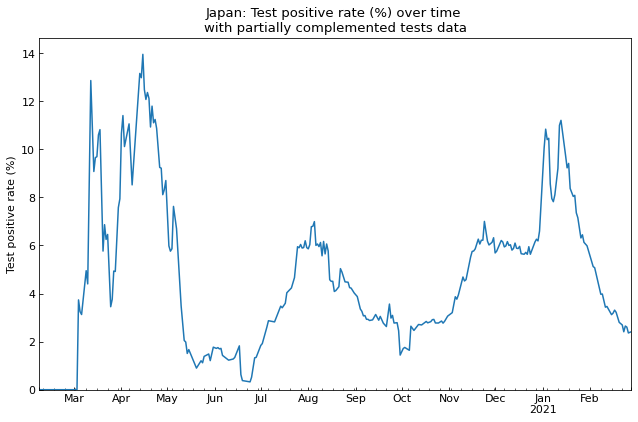

In [54]:
# Positive rate in Japan
_ = pcr_data.positive_rate("Japan")

We can visualize the number of cases with `.map()` method. When `country` is `None`, global map will be shown. Arguments are the same as `JHUData`, but variable name cannot be specified.

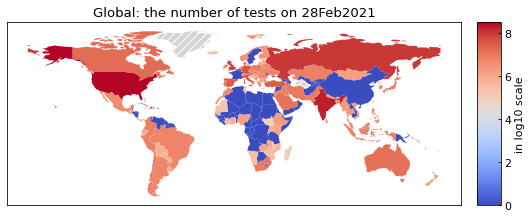

In [55]:
# Global map with country level data
pcr_data.map(country=None)

In [56]:
# Country level data
pcr_data.layer(country=None).tail()

,ISO3,Date,Country,Tests,Confirmed
83912,JPN,2021-02-24,Japan,8026999,427467
83913,JPN,2021-02-25,Japan,8083230,428553
83914,JPN,2021-02-26,Japan,8143924,429472
83915,JPN,2021-02-27,Japan,8203285,430539
83916,JPN,2021-02-28,Japan,8234982,431740


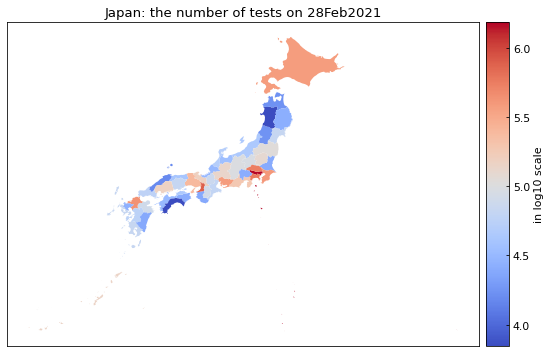

In [57]:
# Country map with province level data
pcr_data.map(country="Japan")

In [58]:
# Province level data
pcr_data.layer(country="Japan").tail()

,ISO3,Date,Country,Province,Tests,Confirmed
16693,JPN,2021-02-24,Japan,Entering,513145,2219
16694,JPN,2021-02-25,Japan,Entering,514674,2220
16695,JPN,2021-02-26,Japan,Entering,516134,2221
16696,JPN,2021-02-27,Japan,Entering,517631,2229
16697,JPN,2021-02-28,Japan,Entering,520132,2235


### The number of vaccinations
Vaccinations is a key factor to end the outbreak as soon as possible. This dataset was saved as `vaccine_data`, an instance of `VaccineData` class.

In [59]:
# The number of vaccinations
type(vaccine_data)

covsirphy.cleaning.vaccine_data.VaccineData

In [60]:
# Description/citation
print(vaccine_data.citation)

Hasell, J., Mathieu, E., Beltekian, D. et al. A cross-country database of COVID-19 testing. Sci Data 7, 345 (2020). https://doi.org/10.1038/s41597-020-00688-8


In [61]:
# Raw data
# vaccine_data.raw.tail()

In [62]:
# Cleaned data
vaccine_data.cleaned().tail()

,Date,Country,ISO3,Product,Vaccinations,Vaccinated_once,Vaccinated_full
4594,2021-02-23,Zimbabwe,ZWE,Sinopharm/Beijing,4041,4041,0
4595,2021-02-24,Zimbabwe,ZWE,Sinopharm/Beijing,7872,7872,0
4596,2021-02-25,Zimbabwe,ZWE,Sinopharm/Beijing,11007,11007,0
4597,2021-02-26,Zimbabwe,ZWE,Sinopharm/Beijing,12579,12579,0
4598,2021-02-27,Zimbabwe,ZWE,Sinopharm/Beijing,15705,15705,0


In [63]:
# Registered countries
pprint(vaccine_data.countries(), compact=True)

['Albania', 'Algeria', 'Andorra', 'Anguilla', 'Argentina', 'Australia',
 'Austria', 'Azerbaijan', 'Bahrain', 'Bangladesh', 'Barbados', 'Belarus',
 'Belgium', 'Bermuda', 'Bolivia', 'Brazil', 'Bulgaria', 'Cambodia', 'Canada',
 'Cayman Islands', 'Chile', 'China', 'Colombia', 'Costa Rica', 'Croatia',
 'Cyprus', 'Czechia', 'Denmark', 'Dominican Republic', 'Ecuador', 'Egypt',
 'El Salvador', 'England', 'Estonia', 'European Union', 'Faeroe Islands',
 'Falkland Islands', 'Finland', 'France', 'Germany', 'Gibraltar', 'Greece',
 'Greenland', 'Guernsey', 'Guyana', 'Hungary', 'Iceland', 'India', 'Indonesia',
 'Iran', 'Ireland', 'Isle of Man', 'Israel', 'Italy', 'Japan', 'Jersey',
 'Kazakhstan', 'Kuwait', 'Latvia', 'Lebanon', 'Liechtenstein', 'Lithuania',
 'Luxembourg', 'Macao', 'Maldives', 'Malta', 'Mauritius', 'Mexico', 'Monaco',
 'Montenegro', 'Morocco', 'Myanmar', 'Nepal', 'Netherlands', 'New Zealand',
 'Northern Cyprus', 'Northern Ireland', 'Norway', 'Oman', 'Pakistan', 'Panama',
 'Paraguay', '

In [64]:
# Subset for a country
vaccine_data.subset("United Kingdom").tail()
# We can use ISO3 codes
# pcr_data.subset("GBR").tail()

,Date,Vaccinations,Vaccinated_once,Vaccinated_full
71,2021-02-22,18558969,17916181,642788
72,2021-02-23,18911978,18242873,669105
73,2021-02-24,19392553,18691835,700718
74,2021-02-25,19913592,19177555,736037
75,2021-02-26,20450858,19682048,768810


We can visualize the number of cases with `.map()` method. Arguments are the same as `JHUData`, but country name cannot be specified.

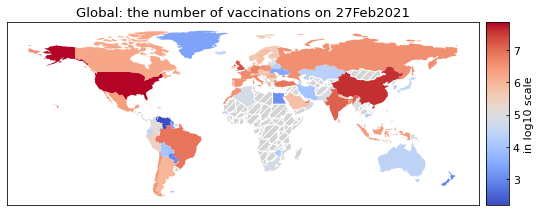

In [65]:
# Global map with country level data
vaccine_data.map()

In [66]:
# Country level data
vaccine_data.layer().tail()

,Date,Country,ISO3,Product,Vaccinations,Vaccinated_once,Vaccinated_full
4594,2021-02-23,Zimbabwe,ZWE,Sinopharm/Beijing,4041,4041,0
4595,2021-02-24,Zimbabwe,ZWE,Sinopharm/Beijing,7872,7872,0
4596,2021-02-25,Zimbabwe,ZWE,Sinopharm/Beijing,11007,11007,0
4597,2021-02-26,Zimbabwe,ZWE,Sinopharm/Beijing,12579,12579,0
4598,2021-02-27,Zimbabwe,ZWE,Sinopharm/Beijing,15705,15705,0


### Population pyramid
With population pyramid, we can divide the population to sub-groups. This will be useful when we analyse the meaning of parameters. For example, how many days go out is different between the sub-groups.
This dataset was saved as `pyramid_data`, an instance of `PopulationPyramidData` class.

In [67]:
# Population pyramid
type(pyramid_data)

covsirphy.cleaning.pyramid.PopulationPyramidData

In [68]:
# Description/citation
print(pyramid_data.citation)

World Bank Group (2020), World Bank Open Data, https://data.worldbank.org/


In [69]:
# Subset will retrieved from the server when set
pyramid_data.subset("Japan").tail()

,Age,Population,Per_total
113,118,255035,0.002174
114,119,255035,0.002174
115,120,255035,0.002174
116,121,255035,0.002174
117,122,255035,0.002174


### Japan-specific dataset
This includes the number of confirmed/infected/fatal/recovered/tests/moderate/severe cases at country/prefecture level and metadata of each prefecture.
This dataset was saved as `japan_data`, an instance of `JapanData` class.

In [70]:
# Japan-specific dataset
type(japan_data)

covsirphy.cleaning.japan_data.JapanData

In [71]:
# Description/citation
print(japan_data.citation)

Lisphilar (2020), COVID-19 dataset in Japan, GitHub repository, https://github.com/lisphilar/covid19-sir/data/japan


In [72]:
# Cleaned dataset
japan_data.cleaned().tail()

,Date,Country,Province,Confirmed,Infected,Fatal,Recovered,Tests,Moderate,Severe,Vaccinations,Vaccinated_once,Vaccinated_full
17082,2021-02-24,Japan,-,427467,16502,7584,403381,8026999,15653,487,17888,17888,0
17083,2021-02-25,Japan,-,428553,15649,7647,405257,8083230,14869,472,21896,21896,0
17084,2021-02-26,Japan,-,429472,15166,7722,406584,8143924,14487,457,28530,28530,0
17085,2021-02-27,Japan,-,430539,14712,7807,408020,8203285,14057,440,28530,28530,0
17086,2021-02-28,Japan,-,431740,14561,7860,409319,8234982,13929,434,28530,28530,0


In [73]:
# Metadata
japan_data.meta().tail()

,Prefecture,Admin_Capital,Admin_Region,Admin_Num,Area_Habitable,Area_Total,Clinic_bed_Care,Clinic_bed_Total,Hospital_bed_Care,Hospital_bed_Specific,Hospital_bed_Total,Hospital_bed_Tuberculosis,Hospital_bed_Type-I,Hospital_bed_Type-II,Population_Female,Population_Male,Population_Total,Location_Latitude,Location_Longitude
42,Kumamoto,Kumamoto,Kyushu,43,2796,7409,497,4628,8340,0,33710,95,2,46,933,833,1765,32.790513,130.742388
43,Oita,Oita,Kyushu,44,1799,6341,269,3561,2618,0,19834,50,2,38,607,546,1152,33.238391,131.612658
44,Miyazaki,Miyazaki,Kyushu,45,1850,7735,206,2357,3682,0,18769,33,1,30,577,512,1089,31.911188,131.423873
45,Kagoshima,Kagoshima,Kyushu,46,3313,9187,652,4827,7750,0,32651,98,1,44,863,763,1626,31.560052,130.557745
46,Okinawa,Naha,Okinawa,47,1169,2281,83,914,3804,0,18710,47,4,20,734,709,1443,26.211761,127.681119


We can visualize the number of cases with `.map()` method. Arguments are the same as `JHUData`, but country name cannot be specified.

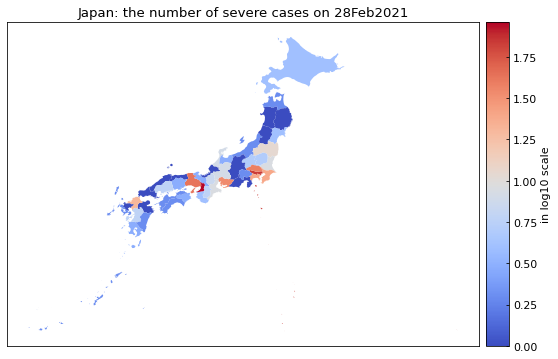

In [74]:
# Country map with province level data
japan_data.map(variable="Severe")

In [75]:
# Province level data
japan_data.layer(country="Japan").tail()

,Date,Country,Province,Confirmed,Infected,Fatal,Recovered,Tests,Moderate,Severe,Vaccinations,Vaccinated_once,Vaccinated_full
16693,2021-02-24,Japan,Entering,2219,31,2,2186,513145,31,0,0,0,0
16694,2021-02-25,Japan,Entering,2220,28,2,2190,514674,28,0,0,0,0
16695,2021-02-26,Japan,Entering,2221,27,2,2192,516134,27,0,0,0,0
16696,2021-02-27,Japan,Entering,2229,34,2,2193,517631,34,0,0,0,0
16697,2021-02-28,Japan,Entering,2235,38,2,2195,520132,38,0,0,0,0


Map with country level data is not prepared, but country level data can be retrieved.

In [76]:
# Country level data
japan_data.layer(country=None).tail()

,Date,Country,Confirmed,Infected,Fatal,Recovered,Tests,Moderate,Severe,Vaccinations,Vaccinated_once,Vaccinated_full
384,2021-02-24,Japan,427467,16502,7584,403381,8026999,15653,487,17888,17888,0
385,2021-02-25,Japan,428553,15649,7647,405257,8083230,14869,472,21896,21896,0
386,2021-02-26,Japan,429472,15166,7722,406584,8143924,14487,457,28530,28530,0
387,2021-02-27,Japan,430539,14712,7807,408020,8203285,14057,440,28530,28530,0
388,2021-02-28,Japan,431740,14561,7860,409319,8234982,13929,434,28530,28530,0
